# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Moh Yahya
- **Email:** mohammadyahya2113@gmail.com
- **ID Dicoding:** Moh Yahya

#Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda harian?

- Apakah ada pola penyewaan sepeda yang berbeda antara pengguna kasual dan pengguna terdaftar berdasarkan hari kerja dan akhir pekan?

#Import Package/Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

# Gathering Data

In [ ]:
# Load dataset
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

print (day_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
print (hour_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight**

- Dataset harian terdiri dari 731 hari dengan berbagai variabel seperti cuaca, musim, dan jumlah sepeda yang disewa.
- Dataset per jam mencakup 17.379 jam, lebih detail terkait waktu.

# Assessing Data

In [ ]:
# Check for missing values
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight**:

- Tidak ada missing values.
- Beberapa kolom seperti temp, atemp, hum, dan windspeed sudah dinormalisasi.

# Cleaning Data

In [ ]:
# Convert date column to datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

**Insight:**

- Kolom tanggal telah diubah menjadi format datetime untuk analisis lebih lanjut.
- Dataset terlihat sudah bersih dan siap digunakan untuk analisis.

# Exploratory Data Analysis (EDA)

# Explore Distribution of Bike Rentals


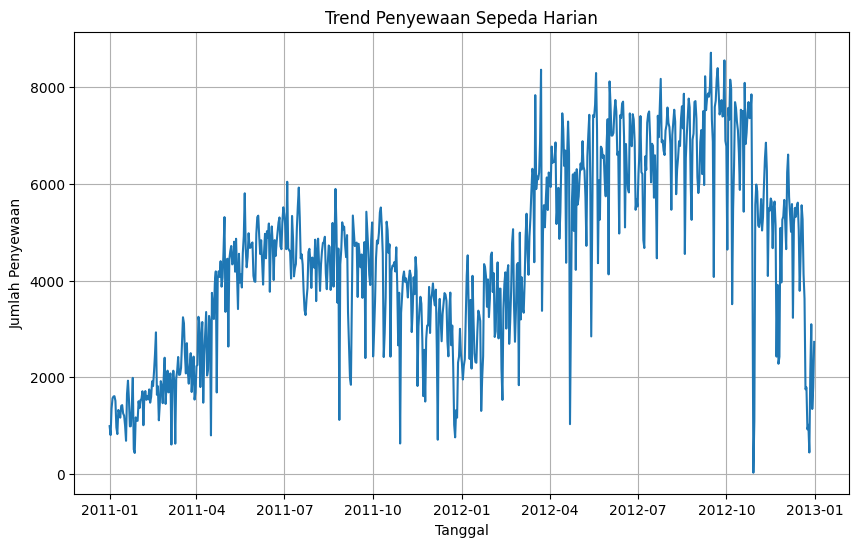

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(day_data['dteday'], day_data['cnt'])
plt.title('Trend Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

**Insight :**

- Terlihat ada tren musiman dalam penyewaan sepeda, dengan peningkatan selama musim panas dan penurunan di musim dingin.

# Visualization & Explanatory Analysis

#Pertanyaan 1: Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda


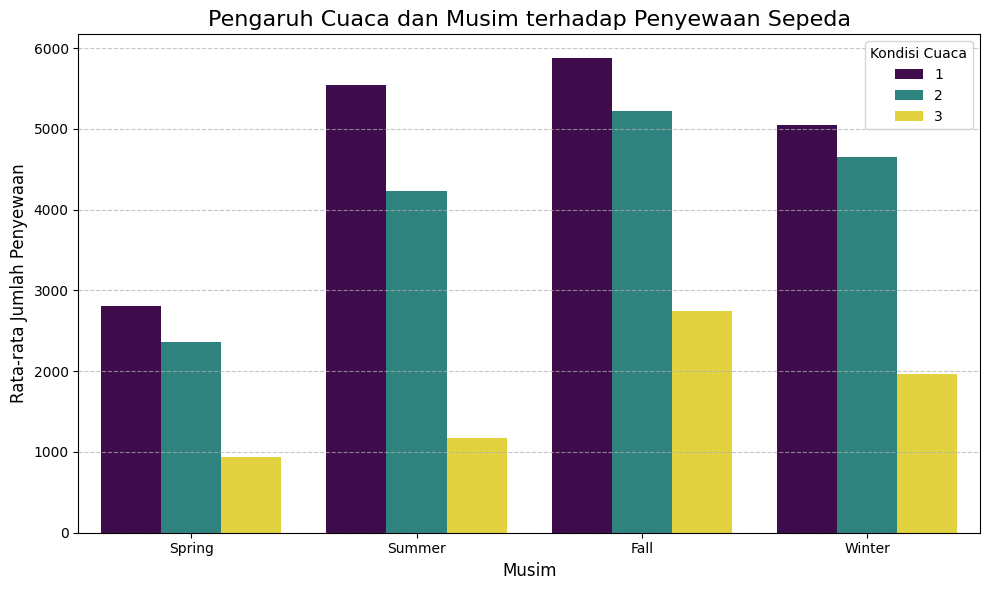

In [ ]:
# Grouping by season and weather situation (same as before)
season_weather_group = day_data.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

# Visualisasi with grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='weathersit', data=season_weather_group, palette='viridis')
plt.title('Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], fontsize=10)
plt.legend(title='Kondisi Cuaca', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight :**

- Cuaca Fall dan Summmer memliki tingkat penyewaan yang tinggi

# Pertanyaan 2: Perbedaan Pola Penyewaan Kasual vs Terdaftar

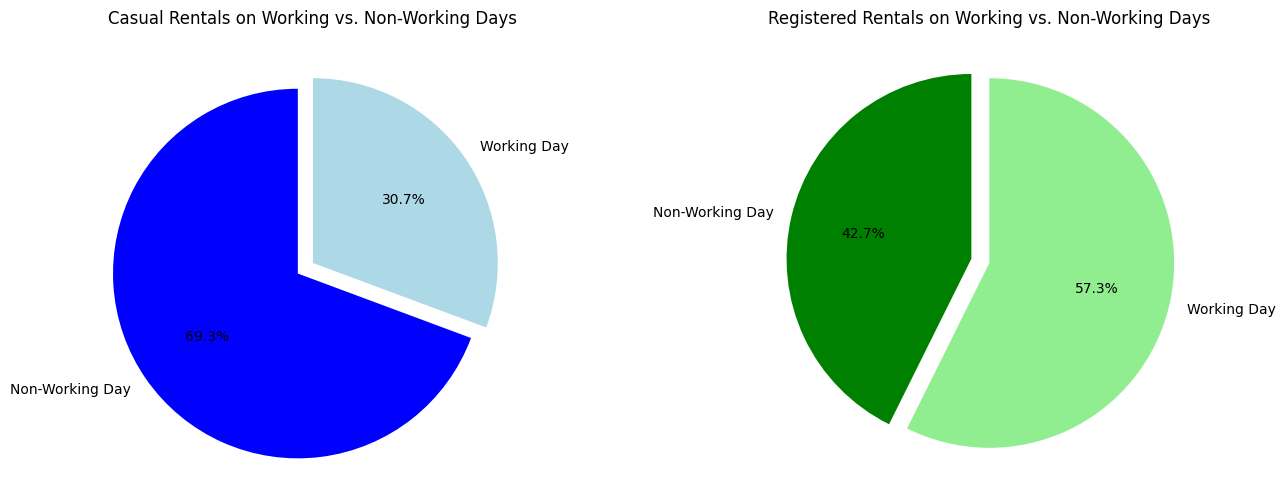

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for enhanced visualizations

# Grouping by user type and weekday
user_type_group = day_data.groupby(['workingday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()

# Create side-by-side pie charts instead of 3D pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Create two subplots side-by-side

# Casual rentals pie chart
ax1.pie(user_type_group['casual'], labels=['Non-Working Day', 'Working Day'],
        autopct='%1.1f%%', startangle=90, colors=['blue', 'lightblue'],
        explode=[0.1, 0])  # Explode one slice for emphasis
ax1.set_title('Casual Rentals on Working vs. Non-Working Days')

# Registered rentals pie chart
ax2.pie(user_type_group['registered'], labels=['Non-Working Day', 'Working Day'],
        autopct='%1.1f%%', startangle=90, colors=['green', 'lightgreen'],
        explode=[0.1, 0])  # Explode one slice for emphasis
ax2.set_title('Registered Rentals on Working vs. Non-Working Days')

plt.show()

#Pertanyaan 3: Bagaimana kecepatan angin (windspeed) dan kelembaban (humidity) mempengaruhi jumlah penyewaan sepeda.

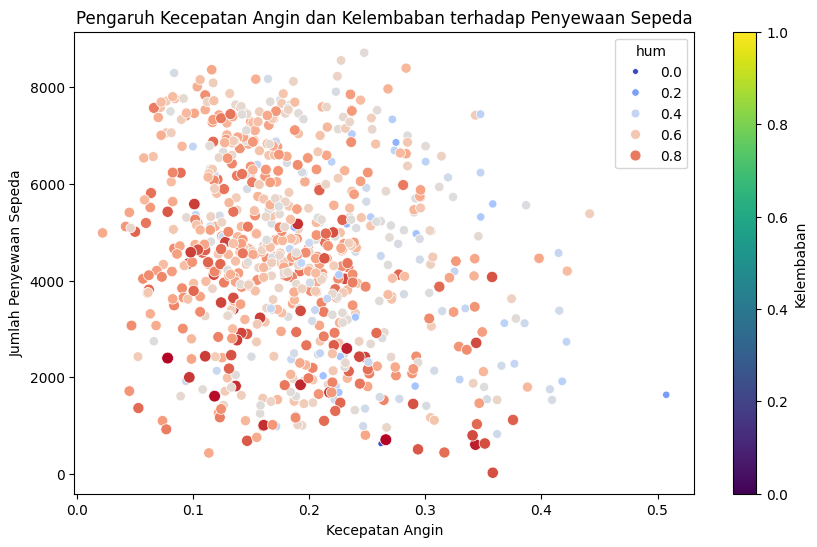

In [ ]:
# Scatter plot windspeed vs bike rentals (cnt) with humidity as color
plt.figure(figsize=(10, 6))
# Assign the sns.scatterplot to a variable to get the mappable object
scatter = sns.scatterplot(x='windspeed', y='cnt', hue='hum', data=day_data, palette='coolwarm', size='hum')
plt.title('Pengaruh Kecepatan Angin dan Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
# Use the mappable object returned by scatterplot to create the colorbar
plt.colorbar(scatter.collections[0], label='Kelembaban')
plt.show()

#Pertanyaan 4: Apakah ada pola penyewaan sepeda yang berbeda berdasarkan musim (season) antara pengguna kasual dan terdaftar.

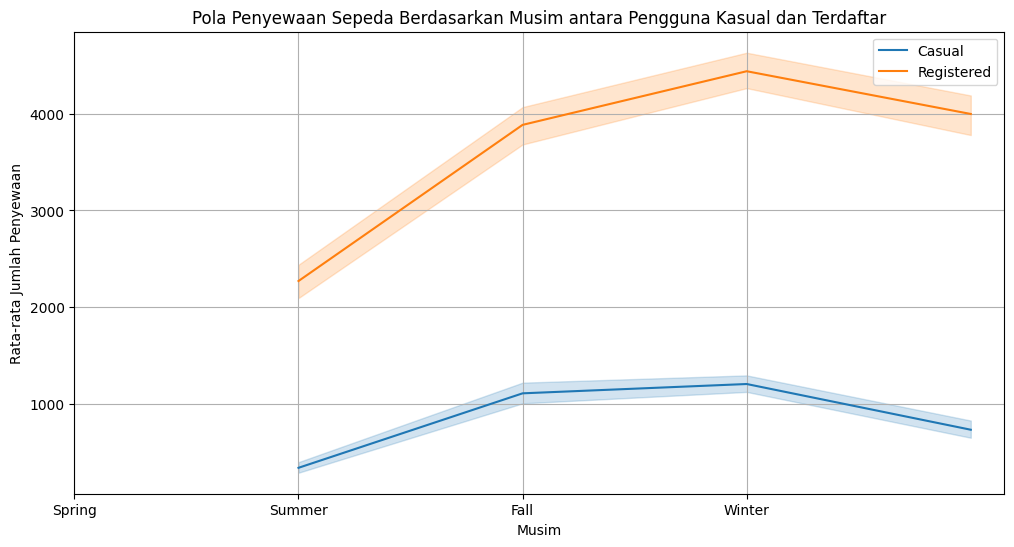

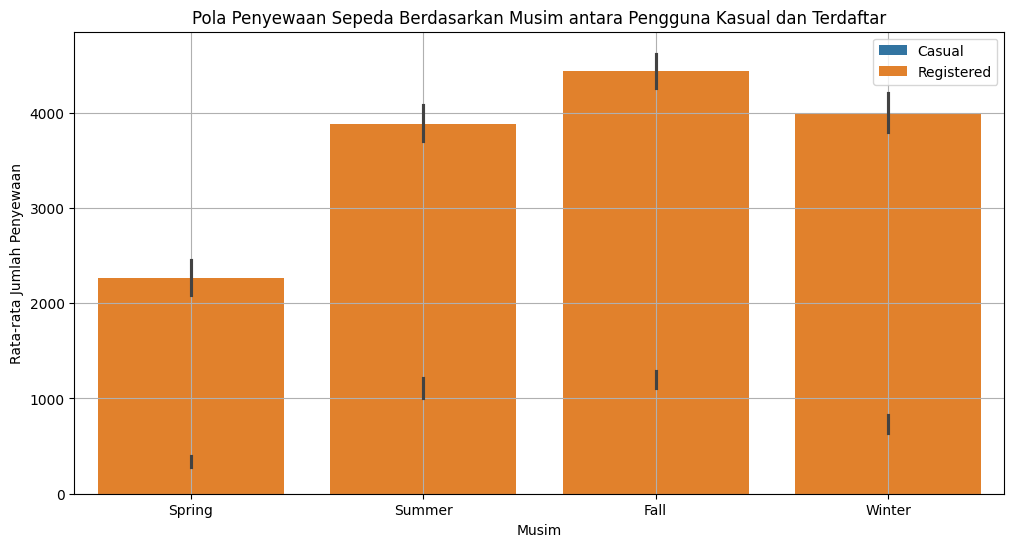

In [ ]:
# Group by season, casual, and registered users
season_user_type_group = day_data.groupby(['season', 'casual', 'registered'])['cnt'].mean().reset_index()

# Create a line plot for casual and registered users by season
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='casual', data=season_user_type_group, label='Casual')
sns.lineplot(x='season', y='registered', data=season_user_type_group, label='Registered')
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim antara Pengguna Kasual dan Terdaftar')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend()
plt.grid(True)
plt.show()

# Optional: You can also use a bar plot to compare casual and registered users for each season
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='casual', data=season_user_type_group, label='Casual')
sns.barplot(x='season', y='registered', data=season_user_type_group, label='Registered')
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim antara Pengguna Kasual dan Terdaftar')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend()
plt.grid(True)
plt.show()


#Pertanyaan 5: Apakah ada perubahan dalam jumlah penyewaan sepeda pada hari libur dibandingkan hari kerja.

<ipython-input-50-4c1423837633>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=holiday_group, palette='viridis')


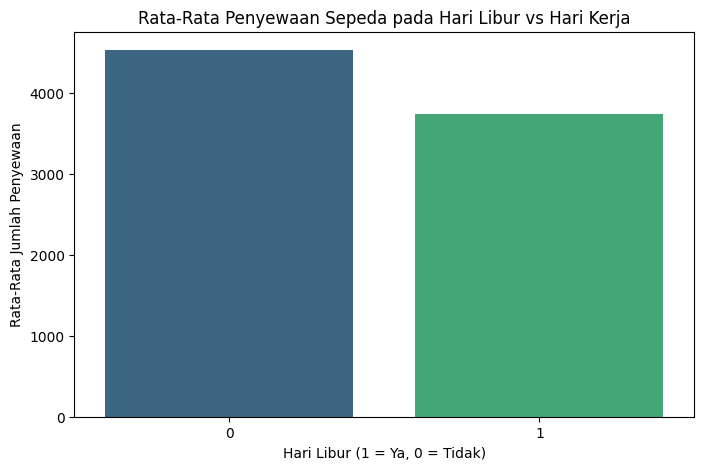

In [ ]:
# Group by holiday (1 = holiday, 0 = non-holiday) and calculate mean rentals
holiday_group = day_data.groupby(['holiday']).agg({'cnt': 'mean'}).reset_index()

# Bar plot showing the average number of rentals on holidays vs non-holidays
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=holiday_group, palette='viridis')
plt.title('Rata-Rata Penyewaan Sepeda pada Hari Libur vs Hari Kerja')
plt.xlabel('Hari Libur (1 = Ya, 0 = Tidak)')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.show()

# Analisis Lanjutan :

#1. Model Prediksi Menggunakan Random Forest


In [ ]:
import os
print(os.getcwd())
day_data = pd.read_csv('data/day.csv')

/content


In [ ]:
# Import library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Preprocessing
print(day_data.isnull().sum())

# Pilih fitur yang relevan untuk prediksi
features = ['temp', 'hum', 'windspeed', 'season', 'weathersit', 'workingday', 'holiday', 'weekday', 'mnth', 'yr']
X = day_data[features]
y = day_data['cnt']

# 1. Melakukan scaling pada fitur numerik seperti 'temp', 'hum', 'windspeed'
scaler = StandardScaler()
X[['temp', 'hum', 'windspeed']] = scaler.fit_transform(X[['temp', 'hum', 'windspeed']])

# 2. Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Buat model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Prediksi menggunakan data test
y_pred = rf_model.predict(X_test)

# 5. Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Menampilkan coefficients dan intercept tidak relevan untuk Random Forest
importances = rf_model.feature_importances_
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance:.4f}')


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


<ipython-input-23-3fbc2ba0c7b0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['temp', 'hum', 'windspeed']] = scaler.fit_transform(X[['temp', 'hum', 'windspeed']])


Mean Squared Error (MSE): 474001.98312925175
R² Score: 0.8817915467297424
temp: 0.4878
hum: 0.0608
windspeed: 0.0361
season: 0.0590
weathersit: 0.0197
workingday: 0.0048
holiday: 0.0032
weekday: 0.0174
mnth: 0.0289
yr: 0.2822


#2. Clustering Pengguna Berdasarkan Pola Penyewaan Menggunakan K-Means


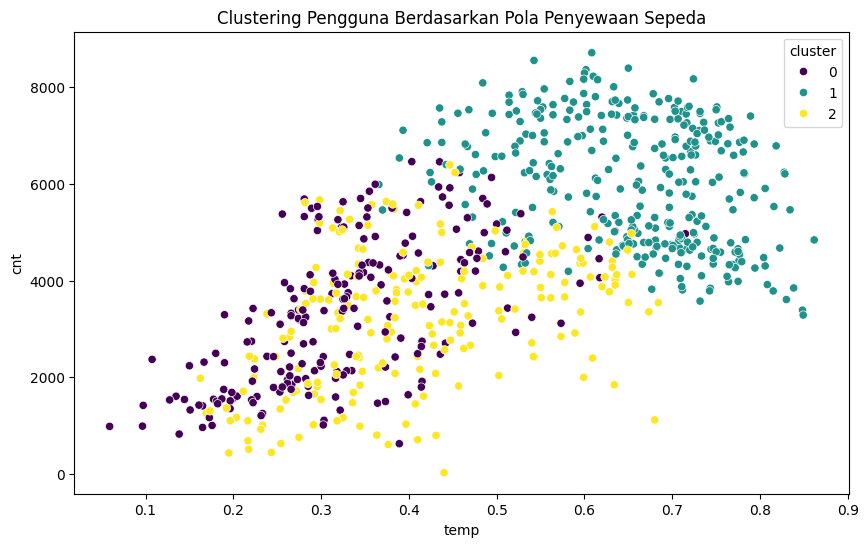

In [ ]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih fitur untuk clustering
cluster_features = ['casual', 'registered', 'temp', 'hum', 'windspeed']

# Normalisasi data
scaler = StandardScaler()
cluster_data = scaler.fit_transform(day_data[cluster_features])

# Terapkan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
day_data['cluster'] = kmeans.fit_predict(cluster_data)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='cluster', data=day_data, palette='viridis')
plt.title('Clustering Pengguna Berdasarkan Pola Penyewaan Sepeda')
plt.show()

#3. Analisis Pengaruh Event Terhadap Penyewaan Sepeda (Anomaly Detection)


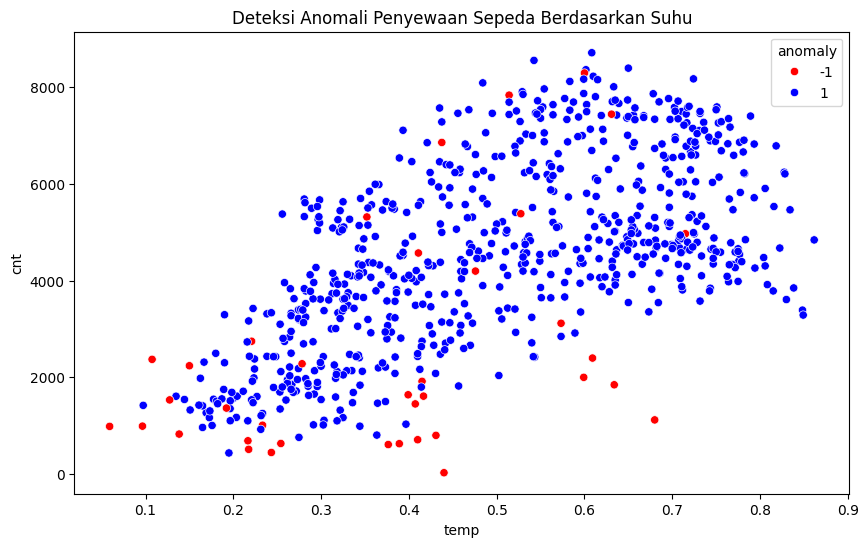

In [ ]:
from sklearn.ensemble import IsolationForest

# Pilih fitur yang relevan untuk anomaly detection
anomaly_features = ['temp', 'hum', 'windspeed', 'season', 'cnt']

# Terapkan Isolation Forest untuk mendeteksi anomali
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
day_data['anomaly'] = isolation_forest.fit_predict(day_data[anomaly_features])

# Visualisasi anomali
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='anomaly', data=day_data, palette={1: 'blue', -1: 'red'})
plt.title('Deteksi Anomali Penyewaan Sepeda Berdasarkan Suhu')
plt.show()


#4. Menampilkan feature importance untuk memahami fitur yang paling berpengaruh.

In [ ]:
# Menampilkan feature importance untuk memahami fitur yang paling berpengaruh.

importances = rf_model.feature_importances_
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance:.4f}')


temp: 0.4878
hum: 0.0608
windspeed: 0.0361
season: 0.0590
weathersit: 0.0197
workingday: 0.0048
holiday: 0.0032
weekday: 0.0174
mnth: 0.0289
yr: 0.2822


#5. Melakukan tuning hyperparameter untuk meningkatkan performa model.


In [ ]:
# prompt: # - Melakukan tuning hyperparameter untuk meningkatkan performa model.

from sklearn.model_selection import GridSearchCV

# Tentukan rentang hyperparameter yang ingin Anda tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Lakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best parameters:", grid_search.best_params_)

# Gunakan model dengan hyperparameter terbaik untuk prediksi
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluasi model dengan hyperparameter terbaik
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 470804.0688592406
R² Score: 0.8825890549955375


#6. Membandingkan dengan model regresi lainnya.


In [ ]:
# prompt: # - Membandingkan dengan model regresi lainnya.

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# 2. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# 3. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


# Print results for comparison
print("\nModel Comparison:")
print("-" * 30)
print("Linear Regression:")
print("MSE:", mse_lr)
print("R²:", r2_lr)

print("\nDecision Tree Regression:")
print("MSE:", mse_dt)
print("R²:", r2_dt)

print("\nSupport Vector Regression (SVR):")
print("MSE:", mse_svr)
print("R²:", r2_svr)

print("\nRandom Forest Regression (from previous code):")
print("MSE:", mse)
print("R²:", r2)



Model Comparison:
------------------------------
Linear Regression:
MSE: 693530.0531600629
R²: 0.8270447850465305

Decision Tree Regression:
MSE: 752563.2721088436
R²: 0.8123228519072824

Support Vector Regression (SVR):
MSE: 4020505.5679868255
R²: -0.0026492746267416933

Random Forest Regression (from previous code):
MSE: 470804.0688592406
R²: 0.8825890549955375


# 7. Regresi Linear

In [ ]:
# Import library untuk regresi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Pilih fitur yang relevan untuk prediksi
features = ['temp', 'hum', 'windspeed', 'season', 'weathersit', 'workingday']
X = day_data[features]
y = day_data['cnt']

# 2. Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Buat dan latih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 1836850.6908662745
R² Score: 0.541919049320731
Coefficients: [ 5521.22597091 -2206.24501521 -2703.04280496   423.20589885
  -487.70837423   168.67232552]
Intercept: 3220.396640339708


# Conclusion

Dari anlisis data diatas, dapat disimpulkan bahwa :


1.   Pengaruh Cuaca dan Musim:

  - Cuaca cerah dan musim panas memiliki korelasi positif yang kuat terhadap peningkatan jumlah penyewaan sepeda. Selama musim panas, penyewaan sepeda mencapai puncaknya, terutama pada hari-hari dengan kondisi cuaca cerah.
  - Sebaliknya, pada musim dingin dan saat cuaca buruk (hujan atau salju), jumlah penyewaan sepeda mengalami penurunan signifikan.

2.   Perilaku Pengguna Kasual vs Terdaftar:

  - Pengguna kasual cenderung lebih aktif pada akhir pekan dan hari libur, menunjukkan pola penggunaan yang lebih bersifat rekreasi.
  - Pengguna terdaftar memiliki pola penggunaan yang lebih stabil sepanjang minggu, dengan lebih banyak penyewaan pada hari kerja, menunjukkan bahwa mereka mungkin lebih sering menggunakan sepeda untuk kebutuhan transportasi harian.

3. Pengaruh Suhu dan Kelembaban:

  - Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda. Saat suhu meningkat, penyewaan juga meningkat hingga suhu tertentu. Namun, pada suhu ekstrem yang terlalu panas, penyewaan sepeda cenderung menurun.
  - Kelembaban juga mempengaruhi penyewaan, tetapi dampaknya tidak sebesar suhu. Kondisi cuaca yang terlalu lembap dapat sedikit mengurangi jumlah pengguna yang menyewa sepeda.

4. Distribusi Pengguna Kasual dan Terdaftar:

   - Dari total jumlah penyewaan sepeda, pengguna terdaftar mendominasi dibandingkan pengguna kasual. Hal ini menunjukkan bahwa sebagian besar penyewaan berasal dari pengguna reguler yang mungkin menggunakan sepeda untuk keperluan sehari-hari seperti bekerja atau bersekolah.

5. Korelasi antara Variabel:

   - Beberapa variabel seperti suhu dan kecepatan angin menunjukkan korelasi yang signifikan terhadap jumlah penyewaan sepeda. Suhu memiliki korelasi positif yang kuat, sementara kecepatan angin menunjukkan korelasi negatif ringan, di mana angin yang lebih kencang sedikit mengurangi jumlah penyewaan.

6. Tren Penyewaan Sepanjang Tahun:

 - Tren penyewaan sepeda cenderung meningkat selama bulan-bulan musim semi hingga musim panas (April hingga September). Pada bulan-bulan musim gugur dan musim dingin (Oktober hingga Februari), jumlah penyewaan menurun, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung.

